<a href="https://colab.research.google.com/github/umbcOoS/waste-classifier/blob/main/WasteClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Waste Classifier

This model has been trained using Fastai. 

**Fastai** is a deep learning library which provides high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains.

The aim of this project is to build a model for waste classification that identifies among the different classes:
- cardboard
- compost
- glass
- metal
- paper
- plastic
- trash

This machine learning model will help people to improve their decision when classifying trash. 

The model has been trained on a set of images which were obtained using **Bing** searcher using the api HTTP.
Those images has been manually cleaned, removing the ones that were not usefull or where in the wrong category.

## Transfer learning 
**ResNet50** is a pre-trained convolutional neural network(CNN) that has 50 layers. It has been already trained with images from the ImageNet database. It classifies 1000 object from very broad categories, such as pencil or animals. The input size of the network is 224x224. This network can be reused to train other model.

Thus, Resnet50 has been used to train the model for the 7 classes.






# Install
Install fastai library

In [ ]:
!pip uninstall fastai
!pip uninstall fastai2
!pip install fastai==2.5.3

Found existing installation: fastai 1.0.61
Uninstalling fastai-1.0.61:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/fastai-1.0.61.dist-info/*
    /usr/local/lib/python3.7/dist-packages/fastai/*
Proceed (y/n)? y
  Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 189 kB 6.9 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 


In [ ]:
from fastai.vision.all import *
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import zipfile
import io
import os
from PIL import Image

# Load model
Let's first download the git repository and load the *model*

In [ ]:
!git clone https://github.com/rootstrap/fastai-waste-classifier

Cloning into 'fastai-waste-classifier'...
remote: Enumerating objects: 2888, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 2888 (delta 10), reused 20 (delta 6), pack-reused 2862
Receiving objects: 100% (2888/2888), 1.39 GiB | 31.24 MiB/s, done.
Resolving deltas: 100% (38/38), done.


Set fastai-waste-classifier as the current directory

In [ ]:
%cd fastai-waste-classifier
import utils

[Errno 2] No such file or directory: 'fastai-waste-classifier'
/content/fastai-waste-classifier


Load the trained model with fastai and use it to classify some images. 

In [ ]:
learn_loaded = load_learner('result-resnet34.pkl')

# Load files
Load your files to be classified

## Case 1: zip file 

In [ ]:
uploaded = files.upload()

Saving images.zip to images.zip


In [ ]:
filename = next(iter(uploaded))
data = zipfile.ZipFile(filename, 'r')
data.extractall() 
filename = filename.split('.')[0]

Remove unwanted files , check that all files in the directory are images 

In [ ]:
! rm $filename/'.DS_Store'

In [ ]:


def check_folder(folder_path):
    for f in os.listdir(folder_path):
      file_path = os.path.join(folder_path, f)
      print('** Path: {}  **'.format(file_path), end="\r", flush=True)
      im = Image.open(file_path)
      rgb_im = im.convert('RGB')

check_folder(filename)

Get the predictions for all the images 

In [ ]:
predictions = utils.get_predictions(learn_loaded, filename)

Plot the images and the obtained predictions

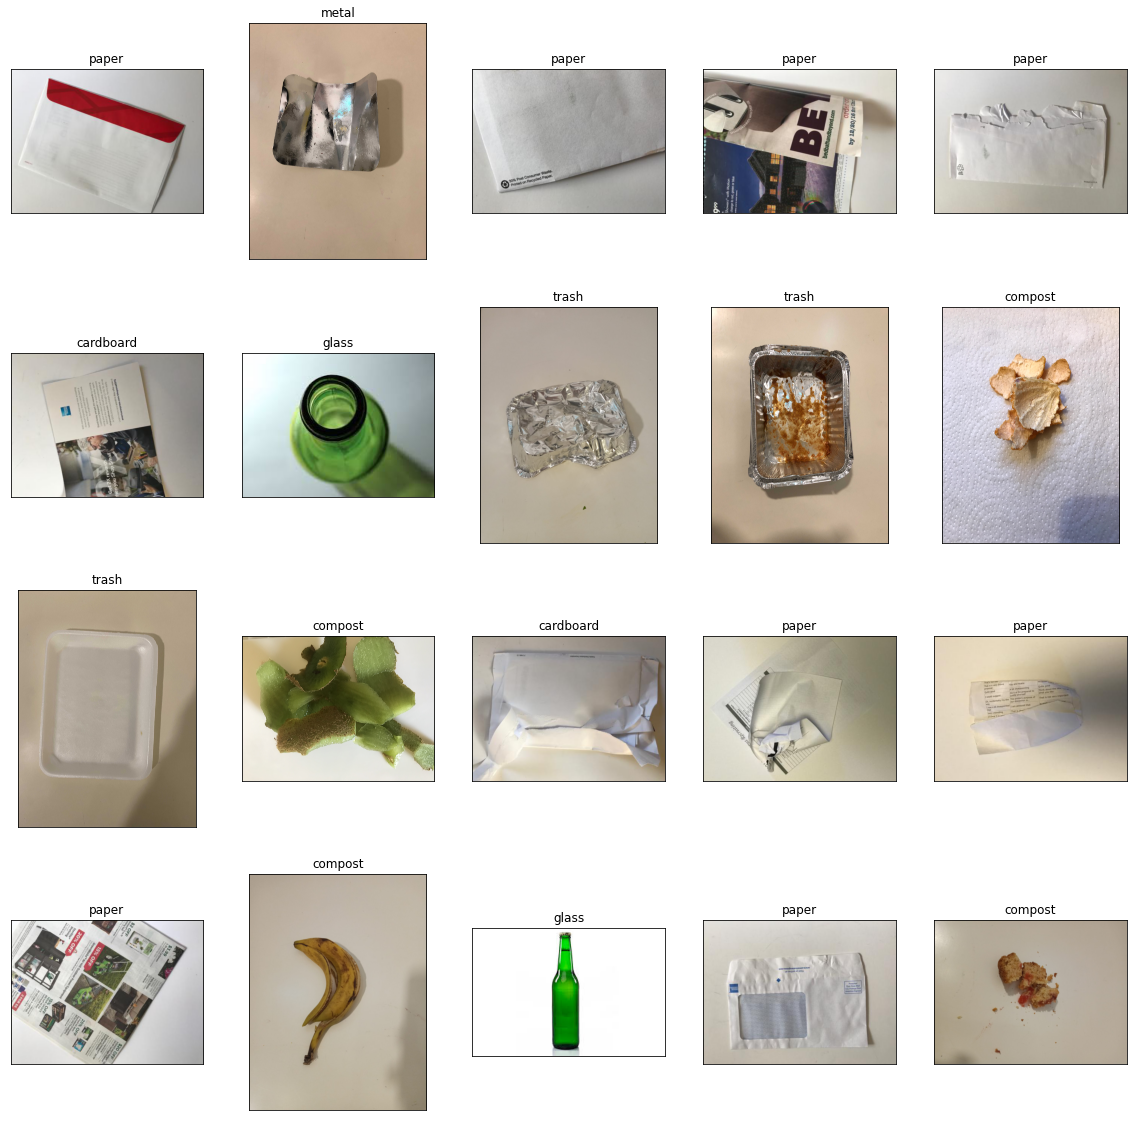

In [ ]:
rows = round(len(predictions)/5)
_, axs = plt.subplots(rows, 5, figsize=(20, 20))
axs = axs.flatten()
for img, ax, p in zip(os.listdir(filename), axs, predictions):
    image=Image.open(f'{filename}/{img}')
    ax.set_title(p[1])
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
  
plt.show()

## Case 2: Upload 1 file to be classified

In [ ]:
def predict_image():
  uploaded = files.upload()
  filename = next(iter(uploaded))
  img = Image.open(f'{filename}')
  plt.figure()
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img) 
  plt.show() 

  # Predict value for the uploaded file
  prediction = learn_loaded.predict(filename)
  num = prediction[1].numpy().tolist()
  print(f'Classified as {prediction[0]}', f'Class number {num}', f' with probability {prediction[2].numpy()[num]}')
  return prediction[0]

Calling to predict_image method, you can upload the image that you want to classify and it will print the result

Saving download.jpeg to download (2).jpeg


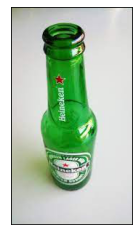

Classified as glass Class number 2  with probability 0.9999185800552368


'glass'

In [ ]:
predict_image()

Saving metal502.jpg to metal502.jpg


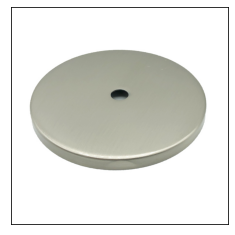

Classified as metal Class number 3  with probability 0.9993143081665039


'metal'

In [ ]:
predict_image()

Saving Screen Shot 2021-10-27 at 13.30.29.png to Screen Shot 2021-10-27 at 13.30.29.png


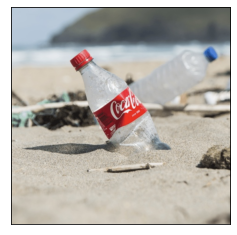

Classified as plastic Class number 5  with probability 0.9999936819076538


'plastic'

In [ ]:
predict_image()